In [1]:
%cd /Users/yantong/Desktop/NLP\ for\ Risk/Code/

/Users/yantong/Desktop/NLP for Risk/Code


## Import Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [4]:
import jieba as jb
import re

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

from tensorflow.keras.layers import Dense, Input, Flatten, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Sequential


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
 
from sklearn.model_selection import cross_val_score


In [7]:
from sklearn.model_selection import GridSearchCV


In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth",None)
pd.set_option('display.width',None)

In [9]:
import json

## Read Data

In [10]:
split_data = pd.read_csv('data_sim_with_content_and_idx.csv')

In [11]:
from ast import literal_eval

In [12]:
newvalues = split_data.copy()
newvalues['baidu_seg'] = newvalues['baidu_seg'].apply(lambda row: literal_eval(row))

In [13]:
newvalues = newvalues[['content','content_index','baidu_seg','baidu_prob']]

## Data Preparation

In [14]:
newvalues['label'] = newvalues['baidu_prob'].apply(lambda row: 1 if row>0.95 else 0)

<AxesSubplot:>

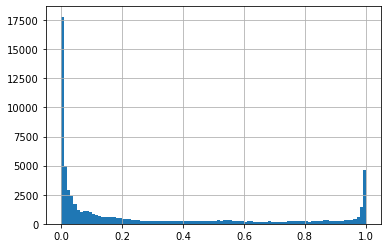

In [15]:
newvalues.baidu_prob.hist(bins = 100)

In [16]:
newvalues.label.value_counts()

0    59369
1     7391
Name: label, dtype: int64

In [17]:
newvalues.shape

(66760, 5)

#### 删除 \u3000

In [18]:
def del_u3000(lst):
    lst = [x for x in lst if not '\\u3000' in x]
    return lst

In [19]:
newvalues.baidu_seg = newvalues.baidu_seg.apply(lambda s: [x for x in s if not '\\u3000' in x])

#### 统计segmentation字数

In [20]:
len(''.join(newvalues.loc[19852,'baidu_seg']))

421

In [21]:
newvalues['word_counts'] = newvalues.baidu_seg.apply(lambda row: len(''.join(row)))

<AxesSubplot:>

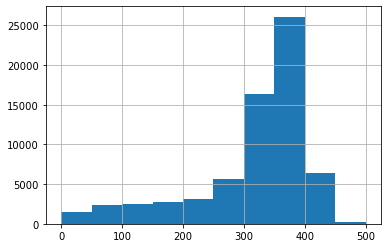

In [22]:
newvalues.word_counts.hist()

In [23]:
newvalues[newvalues.word_counts <= 150].shape

(6402, 6)

In [24]:
newvalues = newvalues[newvalues.word_counts > 150]
newvalues = newvalues.reset_index()

In [25]:
#c = [3245,5861,5863,6678,6681,10257]

In [26]:
#newvalues = newvalues.drop(c)

In [27]:
newvalues = newvalues.drop(['index'],axis = 1)

In [28]:
#newvalues.loc[10257]

In [29]:
for i in range(newvalues.shape[0]):
    if len(newvalues.loc[i,'baidu_seg']) == 20:
        print(i)

In [30]:
#newvalues.loc[19852,'baidu_seg']

In [31]:
# remove data points
# 13709 * 6 ,29981 * 4,37189 * 2, 37764 * 4
newvalues = newvalues.drop(13709)
newvalues = newvalues.reset_index()
newvalues = newvalues.drop(['index'],axis = 1)
# remove data points
# 13709 * 6 ,29981 * 4,37189 * 2, 37764 * 4
newvalues = newvalues.drop(13709)
newvalues = newvalues.reset_index()
newvalues = newvalues.drop(['index'],axis = 1)
# remove data points
# 13709 * 6 ,29981 * 4,37189 * 2, 37764 * 4
newvalues = newvalues.drop(13709)
newvalues = newvalues.reset_index()
newvalues = newvalues.drop(['index'],axis = 1)
# remove data points
# 13709 * 6 ,29981 * 4,37189 * 2, 37764 * 4
newvalues = newvalues.drop(13709)
newvalues = newvalues.reset_index()
newvalues = newvalues.drop(['index'],axis = 1)
# remove data points
# 13709 * 6 ,29981 * 4,37189 * 2, 37764 * 4
newvalues = newvalues.drop(13709)
newvalues = newvalues.reset_index()
newvalues = newvalues.drop(['index'],axis = 1)
# remove data points
# 13709 * 6 ,29981 * 4,37189 * 2, 37764 * 4
newvalues = newvalues.drop(13709)
newvalues = newvalues.reset_index()
newvalues = newvalues.drop(['index'],axis = 1)

# remove data points
# 13709 * 6 ,29981 * 4,37189 * 2, 37764 * 4
newvalues = newvalues.drop(29981)
newvalues = newvalues.reset_index()
newvalues = newvalues.drop(['index'],axis = 1)
# remove data points
# 13709 * 6 ,29981 * 4,37189 * 2, 37764 * 4
newvalues = newvalues.drop(29981)
newvalues = newvalues.reset_index()
newvalues = newvalues.drop(['index'],axis = 1)
# remove data points
# 13709 * 6 ,29981 * 4,37189 * 2, 37764 * 4
newvalues = newvalues.drop(29981)
newvalues = newvalues.reset_index()
newvalues = newvalues.drop(['index'],axis = 1)
# remove data points
# 13709 * 6 ,29981 * 4,37189 * 2, 37764 * 4
newvalues = newvalues.drop(29981)
newvalues = newvalues.reset_index()
newvalues = newvalues.drop(['index'],axis = 1)


# remove data points
# 13709 * 6 ,29981 * 4,37189 * 2, 37764 * 4
newvalues = newvalues.drop(37189)
newvalues = newvalues.reset_index()
newvalues = newvalues.drop(['index'],axis = 1)
# remove data points
# 13709 * 6 ,29981 * 4,37189 * 2, 37764 * 4
newvalues = newvalues.drop(37189)
newvalues = newvalues.reset_index()
newvalues = newvalues.drop(['index'],axis = 1)

# remove data points
# 13709 * 6 ,29981 * 4,37189 * 2, 37764 * 4
newvalues = newvalues.drop(37764)
newvalues = newvalues.reset_index()
newvalues = newvalues.drop(['index'],axis = 1)
# remove data points
# 13709 * 6 ,29981 * 4,37189 * 2, 37764 * 4
newvalues = newvalues.drop(37764)
newvalues = newvalues.reset_index()
newvalues = newvalues.drop(['index'],axis = 1)
# remove data points
# 13709 * 6 ,29981 * 4,37189 * 2, 37764 * 4
newvalues = newvalues.drop(37764)
newvalues = newvalues.reset_index()
newvalues = newvalues.drop(['index'],axis = 1)
# remove data points
# 13709 * 6 ,29981 * 4,37189 * 2, 37764 * 4
newvalues = newvalues.drop(37764)
newvalues = newvalues.reset_index()
newvalues = newvalues.drop(['index'],axis = 1)

## Imbalanced

In [32]:
from collections import Counter
Counter(newvalues.label)

Counter({0: 53441, 1: 6901})

### Resampling -- Oversampling

#### Naive Ramdom Over-sampling

In [33]:
from imblearn.over_sampling import RandomOverSampler

## Modelling

In [34]:
# performance
performance_df = pd.DataFrame()


In [35]:

def perform(model_name,performance,performance_df):
    perform_1 = pd.DataFrame(performance['detail']['1'],index = [model_name])
    perform_0 = pd.DataFrame(performance['detail']['0'],index = [model_name])
    perform_macro = pd.DataFrame(performance['detail']['macro avg'],index = [model_name])
    perform_weighted = pd.DataFrame(performance['detail']['weighted avg'],index = [model_name])
    performance_model = pd.DataFrame()
    performance_model.loc[model_name,'accuracy'] = performance['detail']['accuracy']    
    
    performance_model = pd.concat([performance_model,perform_1,perform_0,perform_macro,perform_weighted],axis = 1)    
    performance_df = pd.concat([performance_df,performance_model],axis = 0)
    return performance_df

In [36]:
# performance = cnn_performance
# model_name = 'cnn'
# performance_df = perform(model_name,performance,performance_df)
# performance_df

In [37]:
# performance

def sklearn_perform(model_name,performance,performance_df):
    perform_1 = pd.DataFrame(performance['1'],index = [model_name])
    perform_0 = pd.DataFrame(performance['0'],index = [model_name])
    perform_macro = pd.DataFrame(performance['macro avg'],index = [model_name])
    perform_weighted = pd.DataFrame(performance['weighted avg'],index = [model_name])
    performance_model = pd.DataFrame()
    performance_model.loc[model_name,'accuracy'] = performance['accuracy']    
    
    performance_model = pd.concat([performance_model,perform_1,perform_0,perform_macro,perform_weighted],axis = 1)    
    performance_df = pd.concat([performance_df,performance_model],axis = 0)
    return performance_df

### Model 1.1: TF-IDF + CNN

In [ ]:
X = newvalues['baidu_seg']
y = newvalues['label']

In [ ]:
import kashgari
from kashgari import utils
from kashgari.embeddings import BertEmbedding
from kashgari.tasks.labeling import BiLSTM_CRF_Model
# from data_load import DataReader

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
from tensorflow.keras.callbacks import TensorBoard
from kashgari.tasks.classification import CNN_Model

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
 
#tfidf = TfidfVectorizer(norm='l2', ngram_range=(1, 2))
#vectorizer = CountVectorizer()    
#features = tfidf.fit_transform(vectorizer.fit_transform(labeled_data_3.content_cut))
#labels = labeled_data_3.label
#print(features.shape)
#print('-----------------------------')
#print(features)
#print(labels)

In [ ]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, 
                                                                                 newvalues.index, 
                                                                                 test_size=0.2, stratify=y, random_state=0)
X_test = X_test.tolist()
y_test = y_test.tolist()



X_train, X_val, y_train, y_val, indices_train, indices_val = train_test_split(X_train, y_train, 
                                                                                 indices_train, 
                                                                                 test_size=0.05, stratify=y_train, random_state=0)

X_train = X_train.tolist()
y_train = y_train.tolist()
X_val = X_val.tolist()
y_val = y_val.tolist()



In [ ]:
# Using TensorBoard record training process
tf_board = TensorBoard(log_dir='tf_dir/cnn_model_split_fb_wx',
                       histogram_freq=5,
                       update_freq='batch')


In [ ]:
model = CNN_Model()
model.fit(X_train, y_train, X_val, y_val,
          batch_size=128,
          callbacks=[tf_board])

In [ ]:
import os
import joblib
os.chdir("saved_model_split_fb_wx")
model.save('tfidf_cnn')

In [ ]:
os.chdir("..")

In [ ]:
tf_idf_cnn_performance = model.evaluate(X_test, y_test)

In [ ]:
performance = tf_idf_cnn_performance
model_name = 'TF-IDF_CNN'
performance_df = perform(model_name,performance,performance_df)
performance_df

### Model 1.2: TF-IDF + CNN + Naive Random Sampling

In [ ]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, 
                                                                                 newvalues.index, 
                                                                                 test_size=0.2, stratify=y, random_state=0)
X_test = X_test.tolist()
y_test = y_test.tolist()

X_train, X_val, y_train, y_val, indices_train, indices_val = train_test_split(X_train, y_train, 
                                                                                 indices_train, 
                                                                                 test_size=0.05, stratify=y_train, random_state=0)

X_train = X_train.tolist()
y_train = y_train.tolist()
X_val = X_val.tolist()
y_val = y_val.tolist()

In [ ]:
X_resampling = np.array(X_train).reshape(-1,1)
y_resampling = y_train
ros = RandomOverSampler(random_state=0)
X_resampled_naive, y_resampled_naive = ros.fit_resample(X_resampling, y_resampling)

In [ ]:
# Using TensorBoard record training process
tf_board = TensorBoard(log_dir='tf_dir/cnn_model_naive_resampling_split_fb_wx',
                       histogram_freq=5,
                       update_freq='batch')


In [ ]:
model = CNN_Model()
model.fit(X_train, y_train, X_val, y_val,
          batch_size=128,
          callbacks=[tf_board])

In [ ]:
import os
import joblib
os.chdir("saved_model_split_fb_wx")
model.save('tfidf_cnn_naive_resampling')

In [ ]:
os.chdir("..")

In [ ]:
tfidf_cnn_naive_resampling_performance = model.evaluate(X_test, y_test)

In [ ]:
performance = tfidf_cnn_naive_resampling_performance
model_name = 'TF-IDF_CNN_naive_resampling'
performance_df = perform(model_name,performance,performance_df)
performance_df

### Model 2.1: 现有样本训练Word2Vec + LR

In [38]:
with open('./stopwords.txt', encoding='utf8') as file:
    line_list = file.readlines()
    stopword_list = [k.strip() for k in line_list]
    stopword_set = set(stopword_list)
    print('停顿词列表，即变量stopword_list中共有%d个元素' %len(stopword_list))
    print('停顿词集合，即变量stopword_set中共有%d个元素' %len(stopword_set))

停顿词列表，即变量stopword_list中共有782个元素
停顿词集合，即变量stopword_set中共有782个元素


In [39]:
#cutWords_List = []
#startTime = time.time()
#content_series = newvalues['baidu_seg']
#for i in range(len(content_series)):
#    content = content_series.iloc[i]
#    cutWords = [k for k in content]
#    if (i + 1) % 3000 == 0:
#        usedTime = time.time() - startTime
#        print('前%d篇文章分词共花费%.2f秒' %(i+1, usedTime))
#    cutWords_list.append(cutWords)

In [40]:
cutWords_list = newvalues['baidu_seg']

In [42]:
import time
from gensim.models import Word2Vec
startTime = time.time()
word2vec_model = Word2Vec(cutWords_list, size=200, iter=10, min_count=20)
usedTime = time.time() - startTime
print('形成word2vec模型共花费%.2f秒' %usedTime)

形成word2vec模型共花费77.66秒


In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
word2vec_model.wv.most_similar('建筑')
# word2vec_model.similarity('治愈','感染')

[('建筑工程', 0.6581544876098633),
 ('装配式建筑', 0.45715031027793884),
 ('建筑业', 0.4417978823184967),
 ('建筑设计', 0.4400182366371155),
 ('市政工程', 0.4136546850204468),
 ('钢结构', 0.397723525762558),
 ('建筑类', 0.3975121080875397),
 ('建筑施工企业', 0.3941515386104584),
 ('内装', 0.3932075500488281),
 ('绿色建筑', 0.3789058029651642)]

#### Word2Vec 

In [45]:
import numpy as np

def get_contentVector(cutWords, word2vec_model):
    vector_list = [word2vec_model.wv[k] for k in cutWords if k in word2vec_model]
    contentVector = np.array(vector_list).mean(axis=0)
    return contentVector

In [46]:
import time

startTime = time.time()
contentVector_list = []
for i in range(len(cutWords_list)):
    cutWords = cutWords_list[i]
    if (i+1) % 3000 == 0:
        usedTime = time.time() - startTime
        print('前%d篇文章内容表示成向量共花费%.2f秒' %(i+1, usedTime))
    contentVector_list.append(list(get_contentVector(cutWords, word2vec_model)))
X = np.array(contentVector_list)

前3000篇文章内容表示成向量共花费2.30秒
前6000篇文章内容表示成向量共花费4.50秒
前9000篇文章内容表示成向量共花费6.39秒
前12000篇文章内容表示成向量共花费8.27秒
前15000篇文章内容表示成向量共花费9.94秒
前18000篇文章内容表示成向量共花费11.64秒
前21000篇文章内容表示成向量共花费13.28秒
前24000篇文章内容表示成向量共花费14.92秒
前27000篇文章内容表示成向量共花费16.85秒
前30000篇文章内容表示成向量共花费19.23秒
前33000篇文章内容表示成向量共花费21.70秒
前36000篇文章内容表示成向量共花费24.08秒
前39000篇文章内容表示成向量共花费25.82秒
前42000篇文章内容表示成向量共花费27.51秒
前45000篇文章内容表示成向量共花费29.80秒
前48000篇文章内容表示成向量共花费32.18秒
前51000篇文章内容表示成向量共花费34.47秒
前54000篇文章内容表示成向量共花费36.39秒
前57000篇文章内容表示成向量共花费38.10秒
前60000篇文章内容表示成向量共花费39.85秒


In [47]:
newvalues_w2v = pd.concat([newvalues,pd.DataFrame(X)],axis = 1)

In [48]:
newvalues.loc[13709,]

content          原标题:重大工程中标公告本公司董事会及全体董事保证本公告内容不存在任何虚假记载、误导性陈述或者重大遗漏，并对其内容的真实性、准确性和完整性承担个别及连带责任。近日，本公司下属中铁建设集团有限公司、中铁十二局集团有限公司分别中标河北雄安新区容东片区B1、B2、C、D1、D2、E组团安置房及配套设施项目-D1组团施工总承包、D2组团施工总承包，中标工期均为396日历天，中标价合计约106.22亿元，约占本公司中国会计准则下2019年营业收入的1.28%。特此公告。2020年5月12日股份有限公司重大工程中标公告本公司董事会及全体董事保证本公告内容不存在任何虚假记载、误导性陈述或者重大遗漏，并对其内容的真实性、准确性和完整性承担个别及连带责任。近日，本公司下属中铁建设集团有限公司、中铁十二局集团有限公司分别中标河北雄安新区容东片区B1、B2、C、D1、D2、E组团安置房及配套设施项目-D1组团施工总承包、D2组团施工总承包，中标工期均为396日历天，中标价合计约106.22亿元，约占本公司中国会计准则下2019年营业收入的1.28%。特此公告。中国铁建股份有限公司重大工程中标公告本公司董事会及全体董事保证本公告内容不存在任何虚假记载、误导性陈述或者重大遗漏，并对其内容的真实性、准确性和完整性承担个别及连带责任。近日，本公司下属中铁建设集团有限公司、中铁十二局集团有限公司分别中标河北雄安新区容东片区B1、B2、C、D1、D2、E组团安置房及配套设施项目-D1组团施工总承包、D2组团施工总承包，中标工期均为396日历天，中标价合计约106.22亿元，约占本公司中国会计准则下2019年营业收入的1.28%。特此公告。中国铁建股份有限公司董事会2020年5月12日
content_index                                                                                                                                                                                                                                        

In [49]:
#newvalues_w2v.to_csv('word2vec_gb_wx_0.95_withcontent.csv')

In [50]:
content_index_list = list(set(newvalues_w2v.content_index))

In [51]:
import random
# split 80% contents for training   11964.
random.seed(1)
train_content_idx = random.sample(content_index_list, int(len(content_index_list)*0.8))

In [52]:
test_content_idx = list(set(content_index_list) - set(train_content_idx))

In [53]:
train_dataset = newvalues_w2v[newvalues_w2v.content_index.isin(train_content_idx)]
test_dataset = newvalues_w2v[newvalues_w2v.content_index.isin(test_content_idx)]

In [54]:
train_dataset.shape

(48638, 206)

In [55]:
test_dataset.shape

(11704, 206)

In [56]:
train_dataset.shape[0]/newvalues_w2v.shape[0] # Almost 80% segmentations for training, 20% for testing

0.8060389115375692

In [57]:
train_X = train_dataset.iloc[:,6:]
test_X = test_dataset.iloc[:,6:]
train_y = train_dataset.label
test_y = test_dataset.label

In [58]:
def plot_roc(labels, predict_prob):
    false_positive_rate,true_positive_rate,thresholds=roc_curve(labels, predict_prob)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate,'b',label='AUC = %0.4f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('TPR')
    plt.xlabel('FPR')

def generate_result_data(test, y_pred):
    test['prediction'] = y_pred
    test_result = test[['content','content_index','label','prediction']].groupby(['content','content_index']).agg(['sum'])
    test_result = test_result.reset_index()
    test_result.columns = ['content','content_index','actual_neg','predictive_neg']
    return test_result


#### Logistic Regression Models

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [61]:
train_lr = train_dataset.copy()
test_lr = test_dataset.copy()
train_X_lr = train_X.copy()
test_X_lr = test_X.copy()
train_y_lr = train_y.copy()
test_y_lr = test_y.copy()

In [62]:
logisticRegression_model = LogisticRegression()
logisticRegression_model.fit(train_X_lr, train_y_lr)
logisticRegression_model.score(test_X_lr, test_y_lr)

0.9288277511961722

In [63]:
y_pred_lr = logisticRegression_model.predict(test_X_lr)

In [64]:
print(classification_report(test_y_lr, y_pred_lr,digits=4))

              precision    recall  f1-score   support

           0     0.9475    0.9745    0.9608     10486
           1     0.7095    0.5353    0.6102      1218

    accuracy                         0.9288     11704
   macro avg     0.8285    0.7549    0.7855     11704
weighted avg     0.9227    0.9288    0.9243     11704



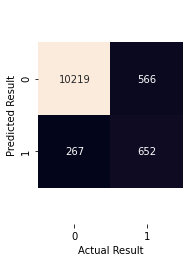

In [65]:
mat = confusion_matrix( y_pred_lr,test_y_lr)
sns.heatmap(mat, square=True, annot=True, cbar=False,fmt='.20g')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b) 
plt.show() 

In [66]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [67]:
predslog = logisticRegression_model.predict_proba(test_X_lr)[:,1]
metrics.roc_auc_score(test_y_lr,predslog, average='macro', sample_weight=None)

0.9438914095171701

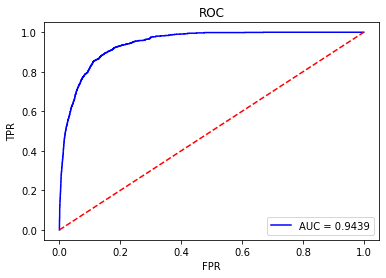

In [68]:
plot_roc(test_y_lr,predslog)

In [69]:
fbwx_w2v_lr_performance = classification_report(test_y_lr, y_pred_lr,digits=4,output_dict=True)
performance = fbwx_w2v_lr_performance
model_name = 'fbwx_w2v_LR'
performance_df = sklearn_perform(model_name,performance,performance_df)
performance_df

,accuracy,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support
fbwx_w2v_LR,0.928828,0.709467,0.535304,0.610201,1218,0.94752,0.974537,0.960839,10486,0.828493,0.754921,0.78552,11704,0.922746,0.928828,0.924349,11704


In [70]:
test_result_lr = generate_result_data(test_lr,y_pred_lr)

In [71]:
test_result_lr[(test_result_lr.actual_neg != 0) & 
               (test_result_lr.predictive_neg == 0)].shape  # 有225篇实际负的预测为正

(223, 4)

In [72]:
# test_result_lr[(test_result_lr.actual_neg != 0) & (test_result_lr.predictive_neg == 0)]  # 有225篇实际负的预测为正

### Model 2.2: 现有样本训练Word2Vec + LR + Naive Resampling

#### Word2Vec

In [73]:
# 训练模型
logisticRegression_model = LogisticRegression()

train_lr_resampling = train_dataset.copy()
test_lr_resampling = test_dataset.copy()
train_X_lr_resampling = train_X.copy()
test_X_lr_resampling = test_X.copy()
train_y_lr_resampling = train_y.copy()
test_y_lr_resampling = test_y.copy()

In [74]:
X_resampling = np.array(train_X_lr_resampling)
y_resampling = train_y_lr_resampling
ros = RandomOverSampler(random_state=0)
X_resampled_naive, y_resampled_naive = ros.fit_resample(X_resampling, y_resampling)

In [75]:
logisticRegression_model.fit(X_resampled_naive, y_resampled_naive)
logisticRegression_model.score(test_X_lr_resampling, test_y_lr_resampling)
#logisticRegression_model.score(X_resampling, y_resampling)

0.872095010252905

In [76]:
y_pred_lr_resampling = logisticRegression_model.predict(test_X_lr_resampling)

In [77]:
print(classification_report(test_y_lr_resampling, y_pred_lr_resampling,digits=4))

              precision    recall  f1-score   support

           0     0.9843    0.8712    0.9243     10486
           1     0.4424    0.8801    0.5888      1218

    accuracy                         0.8721     11704
   macro avg     0.7133    0.8756    0.7566     11704
weighted avg     0.9279    0.8721    0.8894     11704



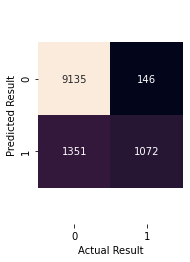

In [78]:
mat = confusion_matrix( y_pred_lr_resampling,test_y_lr_resampling)
sns.heatmap(mat, square=True, annot=True, cbar=False,fmt='.20g')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b) 
plt.show() 

In [79]:
predslog = logisticRegression_model.predict_proba(test_X_lr_resampling)[:,1]
metrics.roc_auc_score(test_y_lr_resampling,predslog, average='macro', sample_weight=None)

0.9449912417432329

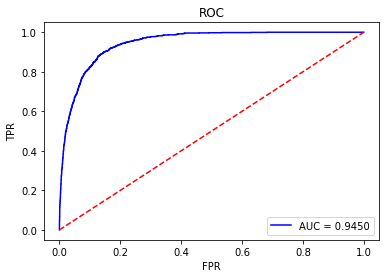

In [80]:
plot_roc(test_y_lr_resampling,predslog)

In [81]:
fbwx_w2v_lr_naive_resampling_performance = classification_report(test_y_lr_resampling, 
                                                                 y_pred_lr_resampling,
                                                                 digits=4,output_dict=True)
performance = fbwx_w2v_lr_naive_resampling_performance
model_name = 'fbwx_w2v_LR_naive_resampling'
performance_df = sklearn_perform(model_name,performance,performance_df)
performance_df

,accuracy,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support
fbwx_w2v_LR,0.928828,0.709467,0.535304,0.610201,1218,0.947520,0.974537,0.960839,10486,0.828493,0.754921,0.785520,11704,0.922746,0.928828,0.924349,11704
fbwx_w2v_LR_naive_resampling,0.872095,0.442427,0.880131,0.588849,1218,0.984269,0.871162,0.924268,10486,0.713348,0.875646,0.756558,11704,0.927881,0.872095,0.889362,11704


In [82]:
test_result_lr_resampling = generate_result_data(test_lr_resampling,y_pred_lr_resampling)

In [ ]:
#false_lr_oversampling = test_result_lr_resampling[test_result_lr_resampling.actual_neg != test_result_lr_resampling.predictive_neg]

In [ ]:
test_result_lr_resampling[(test_result_lr_resampling.actual_neg >= 2) & 
                (test_result_lr_resampling.predictive_neg == 0)].shape

### Model 3.1: 现有样本训练Word2Vec + SVM

In [83]:
#训练模型
model_svm = LinearSVC()

train_svm = train_dataset.copy()
test_svm = test_dataset.copy()
train_X_svm = train_X.copy()
test_X_svm = test_X.copy()
train_y_svm = train_y.copy()
test_y_svm = test_y.copy()

In [84]:
model_svm.fit(train_X_svm, train_y_svm)
y_pred_svm = model_svm.predict(test_X_svm)

In [85]:
print(classification_report(test_y_svm, y_pred_svm,digits=4))

              precision    recall  f1-score   support

           0     0.9467    0.9770    0.9616     10486
           1     0.7268    0.5263    0.6105      1218

    accuracy                         0.9301     11704
   macro avg     0.8367    0.7516    0.7860     11704
weighted avg     0.9238    0.9301    0.9251     11704



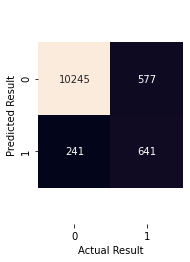

In [86]:
mat = confusion_matrix( y_pred_svm,test_y_svm)
sns.heatmap(mat, square=True, annot=True, cbar=False,fmt='.20g')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b) 
plt.show() 

In [87]:
fbwx_w2v_linear_SVM_performance = classification_report(test_y_svm, y_pred_svm,digits=4,output_dict=True)
performance = fbwx_w2v_linear_SVM_performance
model_name = 'fbwx_w2v_linear_SVM'
performance_df = sklearn_perform(model_name,performance,performance_df)
performance_df

,accuracy,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support
fbwx_w2v_LR,0.928828,0.709467,0.535304,0.610201,1218,0.947520,0.974537,0.960839,10486,0.828493,0.754921,0.785520,11704,0.922746,0.928828,0.924349,11704
fbwx_w2v_LR_naive_resampling,0.872095,0.442427,0.880131,0.588849,1218,0.984269,0.871162,0.924268,10486,0.713348,0.875646,0.756558,11704,0.927881,0.872095,0.889362,11704
fbwx_w2v_linear_SVM,0.930109,0.726757,0.526273,0.610476,1218,0.946683,0.977017,0.961611,10486,0.836720,0.751645,0.786043,11704,0.923796,0.930109,0.925069,11704


In [88]:
test_result_svm = generate_result_data(test_svm,y_pred_svm)

In [89]:
false_svm = test_result_svm[test_result_svm.actual_neg != test_result_svm.predictive_neg]
false_svm.shape

(437, 4)

In [90]:
test_result_svm[(test_result_svm.actual_neg != 0) & (test_result_svm.predictive_neg == 0)].shape  # 有240篇实际负的预测为正

(229, 4)

### Model 3.2 现有样本训练Word2Vec + SVM + Naive Resampling

In [91]:
#训练模型
model_svm_sampling = LinearSVC()

train_svm_sampling = train_dataset.copy()
test_svm_sampling = test_dataset.copy()
train_X_svm_sampling = train_X.copy()
test_X_svm_sampling = test_X.copy()
train_y_svm_sampling = train_y.copy()
test_y_svm_sampling = test_y.copy()

In [92]:
X_resampling = np.array(train_X_svm_sampling)
y_resampling = train_y_svm_sampling
ros = RandomOverSampler(random_state=0)
X_resampled_naive, y_resampled_naive = ros.fit_resample(X_resampling, y_resampling)


In [93]:
startTime = time.time()
model_svm_sampling.fit(X_resampled_naive, y_resampled_naive)
y_pred_svm_sampling = model_svm_sampling.predict(test_X_svm_sampling)
usedTime = time.time() - startTime
usedTime 

In [94]:
print(classification_report(test_y_svm_sampling, y_pred_svm_sampling,digits=4))

              precision    recall  f1-score   support

           0     0.9841    0.8684    0.9226     10486
           1     0.4370    0.8793    0.5838      1218

    accuracy                         0.8695     11704
   macro avg     0.7105    0.8739    0.7532     11704
weighted avg     0.9272    0.8695    0.8874     11704



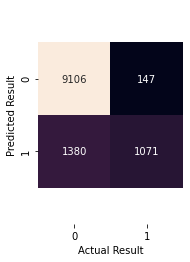

In [95]:
mat = confusion_matrix(y_pred_svm_sampling,test_y_svm_sampling)
sns.heatmap(mat, square=True, annot=True, cbar=False,fmt='.20g')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b) 
plt.show() 

In [96]:
fbwx_w2v_linear_SVM_naive_resampling_performance = classification_report(test_y_svm_sampling, 
                                                                         y_pred_svm_sampling,
                                                                         digits=4,
                                                                         output_dict=True)
performance = fbwx_w2v_linear_SVM_naive_resampling_performance
model_name = 'fbwx_w2v_linear_SVM_naive_resampling'
performance_df = sklearn_perform(model_name,performance,performance_df)
performance_df

,accuracy,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support
fbwx_w2v_LR,0.928828,0.709467,0.535304,0.610201,1218,0.947520,0.974537,0.960839,10486,0.828493,0.754921,0.785520,11704,0.922746,0.928828,0.924349,11704
fbwx_w2v_LR_naive_resampling,0.872095,0.442427,0.880131,0.588849,1218,0.984269,0.871162,0.924268,10486,0.713348,0.875646,0.756558,11704,0.927881,0.872095,0.889362,11704
fbwx_w2v_linear_SVM,0.930109,0.726757,0.526273,0.610476,1218,0.946683,0.977017,0.961611,10486,0.836720,0.751645,0.786043,11704,0.923796,0.930109,0.925069,11704
fbwx_w2v_linear_SVM_naive_resampling,0.869532,0.436965,0.879310,0.583810,1218,0.984113,0.868396,0.922640,10486,0.710539,0.873853,0.753225,11704,0.927173,0.869532,0.887379,11704


In [97]:
# from sklearn.model_selection import cross_validate
# cv_results = cross_validate(clf,
#                             X_resampled_naive, y_resampled_naive, 
#                             cv=5,
#                             scoring=('accuracy', 'roc_auc', 'f1', 'recall'),
#                             n_jobs = -1)
# cv_results

In [98]:
test_result_svm_sampling = generate_result_data(test_svm_sampling,y_pred_svm_sampling)


In [99]:
false_svm_oversampling = test_result_svm_sampling[test_result_svm_sampling.actual_neg != test_result_svm_sampling.predictive_neg]
false_svm_oversampling.shape

(658, 4)

In [100]:
test_result_svm_sampling[(test_result_svm_sampling.actual_neg != 0) & 
                         (test_result_svm_sampling.predictive_neg == 0)].shape  # 有51篇实际负的预测为正

(57, 4)

In [105]:
# View dataset
test_result_svm_sampling[(test_result_svm_sampling.actual_neg != 0) & 
                         (test_result_svm_sampling.predictive_neg == 0)]  

content  \
123                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

### Model 3.3 现有样本训练Word2Vec + kernal_SVM

In [103]:
from sklearn.svm import SVC

In [ ]:
#训练模型

train_poly_svm = train_dataset.copy()
test_poly_svm = test_dataset.copy()
train_X_poly_svm = train_X.copy()
test_X_poly_svm = test_X.copy()
train_y_poly_svm = train_y.copy()
test_y_poly_svm = test_y.copy()

#### SVC(kernel = 'poly', C = 0.1)

In [ ]:
poly_svm_1 = SVC(kernel = 'poly', C = 0.1)
poly_svm_1.fit(train_X_poly_svm,train_y_poly_svm)

In [ ]:
y_pred_poly_svm = poly_svm_1.predict(test_X_poly_svm)

In [ ]:
print(classification_report(test_y_poly_svm, y_pred_poly_svm,digits=4))

In [ ]:
mat = confusion_matrix( y_pred_svm,test_y_svm)
sns.heatmap(mat, square=True, annot=True, cbar=False,fmt='.20g')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b) 
plt.show() 

In [ ]:
fbwx_w2v_poly_SVM_C0_1_performance = classification_report(test_y_poly_svm, y_pred_poly_svm,digits=4,output_dict=True)
performance = fbwx_w2v_poly_SVM_C0_1_performance
model_name = 'fbwx_w2v_poly_SVM C=0.1'
performance_df = sklearn_perform(model_name,performance,performance_df)
performance_df


In [ ]:
test_result_poly_svm_1 = generate_result_data(test_y_poly_svm,y_pred_poly_svm)

In [ ]:
false_poly_svm_1 = test_result_poly_svm_1[test_result_poly_svm_1.actual_neg != test_result_poly_svm_1.predictive_neg]
false_poly_svm_1.shape

In [ ]:
test_result_poly_svm_1[(test_result_poly_svm_1.actual_neg != 0) & 
                       (test_result_poly_svm_1.predictive_neg == 0)].shape  # 有51篇实际负的预测为正

In [ ]:
# View dataset
test_result_poly_svm_1[(test_result_poly_svm_1.actual_neg != 0) & 
                         (test_result_poly_svm_1.predictive_neg == 0)]  

#### kernal_svm = SVC(kernel = 'poly', C = 1)

In [ ]:
kernal_svm = SVC(kernel = 'poly', C = 1)
kernal_svm.fit(train_X_svm,train_y_svm)

In [ ]:
y_pred_svm = kernal_svm.predict(test_X_svm)

In [ ]:
print(classification_report(test_y_svm, y_pred_svm,digits=4))

In [ ]:
mat = confusion_matrix( y_pred_svm,test_y_svm)
sns.heatmap(mat, square=True, annot=True, cbar=False,fmt='.20g')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b) 
plt.show() 

In [ ]:
fbwx_w2v_poly_SVM_C1_performance = classification_report(test_y_svm, y_pred_svm,digits=4,output_dict=True)
performance = fbwx_w2v_poly_SVM_C1_performance
model_name = 'fbwx_w2v_poly_SVM C=1'
performance_df = sklearn_perform(model_name,performance,performance_df)
performance_df

### Model 3.4 现有样本训练Word2Vec + kernal_SVM + Naive Resampling

In [ ]:
X_resampling = np.array(train_X_svm)
y_resampling = train_y_svm
ros = RandomOverSampler(random_state=0)
X_resampled_naive, y_resampled_naive = ros.fit_resample(X_resampling, y_resampling)
         

#### kernal_svm = SVC(kernel = 'poly', C = 0.1)

In [ ]:
kernal_svm = SVC(kernel = 'poly', C = 0.1)
kernal_svm.fit(X_resampled_naive,y_resampled_naive)

In [ ]:
y_pred_svm = kernal_svm.predict(test_X_svm)

In [ ]:
print(classification_report(test_y_svm, y_pred_svm,digits=4))

In [ ]:
mat = confusion_matrix( y_pred_svm,test_y_svm)
sns.heatmap(mat, square=True, annot=True, cbar=False,fmt='.20g')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim()
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [ ]:
fbwx_w2v_poly_SVM_C0_1_naive_resampling_performance = classification_report(test_y_svm, y_pred_svm,digits=4,output_dict=True)
performance = fbwx_w2v_poly_SVM_C0_1_naive_resampling_performance
model_name = 'fbwx_w2v_poly_SVM(C=0.1)_naive_resampling'
performance_df = sklearn_perform(model_name,performance,performance_df)
performance_df


#### kernal_svm = SVC(kernel = 'poly', C = 1)


In [ ]:
kernal_svm = SVC(kernel = 'poly', C = 1)
kernal_svm.fit(X_resampled_naive,y_resampled_naive)

In [ ]:
y_pred_svm = kernal_svm.predict(test_X_svm)

In [ ]:
print(classification_report(test_y_svm, y_pred_svm,digits=4))

In [ ]:
mat = confusion_matrix( y_pred_svm,test_y_svm)
sns.heatmap(mat, square=True, annot=True, cbar=False,fmt='.20g')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b) 
plt.show() 

In [ ]:
fbwx_w2v_poly_SVM_C1_naive_resampling_performance = classification_report(test_y_svm, y_pred_svm,digits=4,output_dict=True)
performance = fbwx_w2v_poly_SVM_C1_naive_resampling_performance
model_name = 'fbwx_w2v_poly_SVM(C=1)_naive_resampling'
performance_df = sklearn_perform(model_name,performance,performance_df)
performance_df

### Model 3.5 现有样本训练Word2Vec + RBF_SVM 
rbf SVM 有较大的提升
计算时间太长，一个模型跑了30+ min

In [104]:
#训练模型

train_rbf_svm = train_dataset.copy()
test_rbf_svm = test_dataset.copy()
train_X_rbf_svm = train_X.copy()
test_X_rbf_svm = test_X.copy()
train_y_rbf_svm = train_y.copy()
test_y_rbf_svm = test_y.copy()

In [105]:
startTime = time.time()
rbf_svm_1 = SVC(C=1.0, kernel='rbf', gamma=0.1)
rbf_svm_1.fit(train_X_rbf_svm,train_y_rbf_svm)
usedTime = time.time() - startTime
usedTime 

348.0400559902191

In [106]:
y_pred_rbf_svm = rbf_svm_1.predict(test_X_rbf_svm)

In [107]:
print(classification_report(test_y_rbf_svm, y_pred_rbf_svm,digits=4))

              precision    recall  f1-score   support

           0     0.9474    0.9810    0.9639     10486
           1     0.7648    0.5312    0.6269      1218

    accuracy                         0.9342     11704
   macro avg     0.8561    0.7561    0.7954     11704
weighted avg     0.9284    0.9342    0.9289     11704



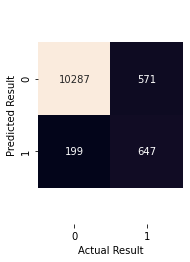

In [108]:
mat = confusion_matrix(y_pred_rbf_svm, test_y_rbf_svm)
sns.heatmap(mat, square=True, annot=True, cbar=False,fmt='.20g')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim()
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [109]:
fbwx_w2v_rbf_SVM_gm0_1_performance = classification_report(test_y_rbf_svm, 
                                                           y_pred_rbf_svm,
                                                           digits=4,output_dict=True)
performance = fbwx_w2v_rbf_SVM_gm0_1_performance
model_name = 'fbwx_w2v_rbf_SVM(gamma=0.1)'
performance_df = sklearn_perform(model_name,performance,performance_df)
performance_df


,accuracy,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support
fbwx_w2v_LR,0.928828,0.709467,0.535304,0.610201,1218,0.947520,0.974537,0.960839,10486,0.828493,0.754921,0.785520,11704,0.922746,0.928828,0.924349,11704
fbwx_w2v_LR_naive_resampling,0.872095,0.442427,0.880131,0.588849,1218,0.984269,0.871162,0.924268,10486,0.713348,0.875646,0.756558,11704,0.927881,0.872095,0.889362,11704
fbwx_w2v_linear_SVM,0.930109,0.726757,0.526273,0.610476,1218,0.946683,0.977017,0.961611,10486,0.836720,0.751645,0.786043,11704,0.923796,0.930109,0.925069,11704
fbwx_w2v_linear_SVM_naive_resampling,0.869532,0.436965,0.879310,0.583810,1218,0.984113,0.868396,0.922640,10486,0.710539,0.873853,0.753225,11704,0.927173,0.869532,0.887379,11704
fbwx_w2v_rbf_SVM(gamma=0.1),0.934211,0.764775,0.531199,0.626938,1218,0.947412,0.981022,0.963924,10486,0.856094,0.756111,0.795431,11704,0.928406,0.934211,0.928855,11704


In [110]:
test_result_rbf_svm_1 = generate_result_data(test_rbf_svm,y_pred_rbf_svm)

In [111]:
test_result_rbf_svm_1[(test_result_rbf_svm_1.actual_neg != 0) & 
                         (test_result_rbf_svm_1.predictive_neg == 0)].shape  # 有240篇实际负的预测为正

(239, 4)

### Model 3.6 现有样本训练Word2Vec + RBF_SVM + Naive Resampling

In [112]:
train_rbf_svm_resampling = train_dataset.copy()
test_rbf_svm_resampling = test_dataset.copy()
train_X_rbf_svm_resampling = train_X.copy()
test_X_rbf_svm_resampling = test_X.copy()
train_y_rbf_svm_resampling = train_y.copy()
test_y_rbf_svm_resampling = test_y.copy()

X_resampling = np.array(train_X_rbf_svm_resampling)
y_resampling = train_y_rbf_svm_resampling
ros = RandomOverSampler(random_state=0)
X_resampled_naive, y_resampled_naive = ros.fit_resample(X_resampling, y_resampling)

In [113]:
#训练模型

startTime = time.time()
rbf_svm_1_resampling = SVC(C=1.0, kernel='rbf', gamma=0.1)
rbf_svm_1_resampling.fit(X_resampled_naive,y_resampled_naive)
usedTime = time.time() - startTime
usedTime

2054.3183097839355

In [114]:
y_pred_rbf_svm_1_resampling = rbf_svm_1_resampling.predict(test_X_rbf_svm_resampling)

In [115]:
print(classification_report(test_y_rbf_svm_resampling, y_pred_rbf_svm_1_resampling,digits=4))

              precision    recall  f1-score   support

           0     0.9717    0.9395    0.9553     10486
           1     0.5949    0.7644    0.6691      1218

    accuracy                         0.9213     11704
   macro avg     0.7833    0.8520    0.8122     11704
weighted avg     0.9325    0.9213    0.9256     11704



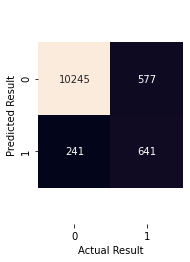

In [116]:
mat = confusion_matrix( y_pred_svm,test_y_svm)
sns.heatmap(mat, square=True, annot=True, cbar=False,fmt='.20g')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b) 
plt.show() 

In [117]:
fbwx_w2v_rbf_SVM_gm0_1_naive_resampling_performance = classification_report(test_y_rbf_svm_resampling, 
                                                                            y_pred_rbf_svm_1_resampling,
                                                                            digits=4,output_dict=True)
performance = fbwx_w2v_rbf_SVM_gm0_1_naive_resampling_performance
model_name = 'fbwx_w2v_rbf_SVM(gamma=0.1)_naive_resampling'
performance_df = sklearn_perform(model_name,performance,performance_df)
performance_df

,accuracy,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support
fbwx_w2v_LR,0.928828,0.709467,0.535304,0.610201,1218,0.947520,0.974537,0.960839,10486,0.828493,0.754921,0.785520,11704,0.922746,0.928828,0.924349,11704
fbwx_w2v_LR_naive_resampling,0.872095,0.442427,0.880131,0.588849,1218,0.984269,0.871162,0.924268,10486,0.713348,0.875646,0.756558,11704,0.927881,0.872095,0.889362,11704
fbwx_w2v_linear_SVM,0.930109,0.726757,0.526273,0.610476,1218,0.946683,0.977017,0.961611,10486,0.836720,0.751645,0.786043,11704,0.923796,0.930109,0.925069,11704
fbwx_w2v_linear_SVM_naive_resampling,0.869532,0.436965,0.879310,0.583810,1218,0.984113,0.868396,0.922640,10486,0.710539,0.873853,0.753225,11704,0.927173,0.869532,0.887379,11704
fbwx_w2v_rbf_SVM(gamma=0.1),0.934211,0.764775,0.531199,0.626938,1218,0.947412,0.981022,0.963924,10486,0.856094,0.756111,0.795431,11704,0.928406,0.934211,0.928855,11704
fbwx_w2v_rbf_SVM(gamma=0.1)_naive_resampling,0.921309,0.594888,0.764368,0.669062,1218,0.971693,0.939538,0.955345,10486,0.783291,0.851953,0.812204,11704,0.932480,0.921309,0.925553,11704


In [118]:
test_result_svm_sampling = generate_result_data(test_rbf_svm_resampling,y_pred_rbf_svm_1_resampling)

### Model 3.7 现有样本训练Word2Vec + RBF_SVM + gamma = 1/k

In [119]:
startTime = time.time()
rbf_svm_2 = SVC(kernel='rbf')
rbf_svm_2.fit(train_X_rbf_svm,train_y_rbf_svm)
usedTime = time.time() - startTime
usedTime

183.7687759399414

In [120]:
print(usedTime)

183.7687759399414


In [121]:
y_pred_svm_2 = rbf_svm_2.predict(test_X_rbf_svm)
y_pred_rbf_svm_2 = rbf_svm_1.predict(test_X_rbf_svm)

In [122]:
print(classification_report(test_y_rbf_svm, y_pred_rbf_svm_2,digits=4))

              precision    recall  f1-score   support

           0     0.9469    0.9821    0.9642     10486
           1     0.7732    0.5263    0.6263      1218

    accuracy                         0.9346     11704
   macro avg     0.8601    0.7542    0.7952     11704
weighted avg     0.9289    0.9346    0.9290     11704



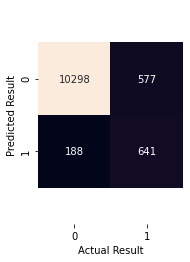

In [123]:
mat = confusion_matrix(y_pred_rbf_svm_2,test_y_rbf_svm)
sns.heatmap(mat, square=True, annot=True, cbar=False,fmt='.20g')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b) 
plt.show() 

In [124]:
fbwx_w2v_rbf_SVM_performance = classification_report(test_y_rbf_svm, 
                                                           y_pred_rbf_svm_2,
                                                           digits=4,output_dict=True)
performance = fbwx_w2v_rbf_SVM_performance
model_name = 'fbwx_w2v_rbf_SVM(gamma=1/k)'
performance_df = sklearn_perform(model_name,performance,performance_df)
performance_df


,accuracy,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support
fbwx_w2v_LR,0.928828,0.709467,0.535304,0.610201,1218,0.947520,0.974537,0.960839,10486,0.828493,0.754921,0.785520,11704,0.922746,0.928828,0.924349,11704
fbwx_w2v_LR_naive_resampling,0.872095,0.442427,0.880131,0.588849,1218,0.984269,0.871162,0.924268,10486,0.713348,0.875646,0.756558,11704,0.927881,0.872095,0.889362,11704
fbwx_w2v_linear_SVM,0.930109,0.726757,0.526273,0.610476,1218,0.946683,0.977017,0.961611,10486,0.836720,0.751645,0.786043,11704,0.923796,0.930109,0.925069,11704
fbwx_w2v_linear_SVM_naive_resampling,0.869532,0.436965,0.879310,0.583810,1218,0.984113,0.868396,0.922640,10486,0.710539,0.873853,0.753225,11704,0.927173,0.869532,0.887379,11704
fbwx_w2v_rbf_SVM(gamma=0.1),0.934211,0.764775,0.531199,0.626938,1218,0.947412,0.981022,0.963924,10486,0.856094,0.756111,0.795431,11704,0.928406,0.934211,0.928855,11704
fbwx_w2v_rbf_SVM(gamma=0.1)_naive_resampling,0.921309,0.594888,0.764368,0.669062,1218,0.971693,0.939538,0.955345,10486,0.783291,0.851953,0.812204,11704,0.932480,0.921309,0.925553,11704
fbwx_w2v_rbf_SVM(gamma=1/k),0.934638,0.773221,0.526273,0.626282,1218,0.946943,0.982071,0.964187,10486,0.860082,0.754172,0.795235,11704,0.928864,0.934638,0.929022,11704


In [126]:
test_result_rbf_svm_2_sampling = generate_result_data(test_rbf_svm,y_pred_rbf_svm_2)

### Model 3.8 现有样本训练Word2Vec + RBF_SVM + gamma = 1/k + Naive Resampling

In [127]:
startTime = time.time()
rbf_svm_2_resampling = SVC(kernel='rbf')
rbf_svm_2_resampling.fit(X_resampled_naive,y_resampled_naive)
usedTime = time.time() - startTime
usedTime

915.6868517398834

In [128]:
print(usedTime)

915.6868517398834


In [129]:
y_pred_rbf_svm_2_resampling = rbf_svm_2_resampling.predict(test_X_rbf_svm_resampling)

In [130]:
print(classification_report(test_y_rbf_svm_resampling, y_pred_rbf_svm_2_resampling,digits=4))

              precision    recall  f1-score   support

           0     0.9839    0.8955    0.9376     10486
           1     0.4926    0.8736    0.6300      1218

    accuracy                         0.8932     11704
   macro avg     0.7382    0.8845    0.7838     11704
weighted avg     0.9327    0.8932    0.9056     11704



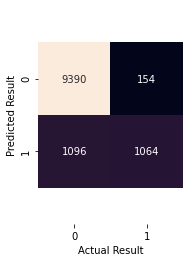

In [131]:
mat = confusion_matrix( y_pred_rbf_svm_2_resampling,test_y_rbf_svm_resampling)
sns.heatmap(mat, square=True, annot=True, cbar=False,fmt='.20g')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b) 
plt.show() 

In [132]:
fbwx_w2v_rbf_SVM_naive_resampling_performance = classification_report(test_y_rbf_svm_resampling, 
                                                                      y_pred_rbf_svm_2_resampling,
                                                                      digits=4,output_dict=True)
performance = fbwx_w2v_rbf_SVM_naive_resampling_performance
model_name = 'fbwx_w2v_rbf_SVM(gamma=1/k)_naive_resampling'
performance_df = sklearn_perform(model_name,performance,performance_df)
performance_df

,accuracy,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support
fbwx_w2v_LR,0.928828,0.709467,0.535304,0.610201,1218,0.947520,0.974537,0.960839,10486,0.828493,0.754921,0.785520,11704,0.922746,0.928828,0.924349,11704
fbwx_w2v_LR_naive_resampling,0.872095,0.442427,0.880131,0.588849,1218,0.984269,0.871162,0.924268,10486,0.713348,0.875646,0.756558,11704,0.927881,0.872095,0.889362,11704
fbwx_w2v_linear_SVM,0.930109,0.726757,0.526273,0.610476,1218,0.946683,0.977017,0.961611,10486,0.836720,0.751645,0.786043,11704,0.923796,0.930109,0.925069,11704
fbwx_w2v_linear_SVM_naive_resampling,0.869532,0.436965,0.879310,0.583810,1218,0.984113,0.868396,0.922640,10486,0.710539,0.873853,0.753225,11704,0.927173,0.869532,0.887379,11704
fbwx_w2v_rbf_SVM(gamma=0.1),0.934211,0.764775,0.531199,0.626938,1218,0.947412,0.981022,0.963924,10486,0.856094,0.756111,0.795431,11704,0.928406,0.934211,0.928855,11704
fbwx_w2v_rbf_SVM(gamma=0.1)_naive_resampling,0.921309,0.594888,0.764368,0.669062,1218,0.971693,0.939538,0.955345,10486,0.783291,0.851953,0.812204,11704,0.932480,0.921309,0.925553,11704
fbwx_w2v_rbf_SVM(gamma=1/k),0.934638,0.773221,0.526273,0.626282,1218,0.946943,0.982071,0.964187,10486,0.860082,0.754172,0.795235,11704,0.928864,0.934638,0.929022,11704
fbwx_w2v_rbf_SVM(gamma=1/k)_naive_resampling,0.893199,0.492593,0.873563,0.629959,1218,0.983864,0.895480,0.937594,10486,0.738228,0.884521,0.783776,11704,0.932739,0.893199,0.905579,11704


In [133]:
test_result_rbf_svm_2 = generate_result_data(test_rbf_svm_resampling,y_pred_rbf_svm_2_resampling)

### Model 4.1 现有样本训练Word2Vec + XGBoost

In [ ]:
import xgboost as xgb

In [ ]:

train_xgb = train_dataset.copy()
test_xgb = test_dataset.copy()
train_X_xgb = train_X.copy()
test_X_xgb = test_X.copy()
train_y_xgb = train_y.copy()
test_y_xgb = test_y.copy()


In [ ]:
train_X_xgb.shape

In [ ]:
params={
'booster':'gbtree', 
'objective': 'binary:logistic',  #二分类的逻辑回归问题，输出为概率
'eval_metric' : 'auc',  # 以auc作为衡量规则
'gamma':0.05,  # 在树的叶子节点下一个分区的最小损失，越大算法模型越保守 。[0:]
'n_estimators' : 10,
'max_depth':4, # 构建树的深度 [1:] 需要用单颗树较少的深度来减少偏差 一般3-10 这里调低深度使得模型更为贪婪
#'lambda':450,  # L2 正则项权重
'subsample':0.7, # 采样训练数据，设置为0.5，随机选择一般的数据实例 (0:1]
'colsample_bytree':0.7, # 构建树树时的采样比率 (0:1]
#'min_child_weight':12, # 节点的最少特征数
'scale_pos_weight' : 2.349911190053286,
'silent':0 ,
'eta': 0.05, # 如同学习率http://localhost:8889/notebooks/Test.ipynb#
'seed':701,
'nthreads':-1,# cpu 线程数,根据自己U的个数适当调整
}

In [ ]:
word2vec_gb_wx.label.value_counts()

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5,
                                      learning_rate= 0.05, #0.0001到0.1之间 太小速度很慢
                                      verbosity=1, 
                                      objective='binary:logistic',
                                      subsample = 0.7,
                                      colsample_bytree = 0.7,
                                      scale_pos_weight = 43770/16572, #不平衡处理 根据word2vec_gb_wx.label.value_counts() 决定
                                      random_state=1,
                                      nthreads = -1
                                     # 这里没有用到n_estimator, 因为用early_stopping_rounds使得auc最优
                             )


In [ ]:
train_X_xgb, val_X_xgb, train_y_xgb, val_y_xgb = train_test_split(train_X_xgb, train_y_xgb, test_size=0.1)

In [ ]:
startTime = time.time()

xgb_model.fit(train_X_xgb, train_y_xgb, early_stopping_rounds=10, eval_metric="auc",
        eval_set=[(val_X_xgb, val_y_xgb)])

usedTime = time.time() - startTime
usedTime

In [ ]:
y_pred_xgb = xgb_model.predict(test_X_xgb)

In [ ]:
print(classification_report(test_y_xgb, y_pred_xgb,digits=4))

In [ ]:
mat = confusion_matrix(y_pred_xgb,test_y_xgb)
sns.heatmap(mat, square=True, annot=True, cbar=False,fmt='.20g')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b) 
plt.show() 

In [ ]:
fbwx_w2v_xgb_performance = classification_report(test_y_xgb, 
                                                 y_pred_xgb,
                                                 digits=4,output_dict=True)
performance = fbwx_w2v_xgb_performance
model_name = 'fbwx_w2v_XGBoost'
performance_df = sklearn_perform(model_name,performance,performance_df)
performance_df

In [ ]:
test_result_xgb = generate_result_data(test_xgb,y_pred_xgb)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
paramGrid = {"max_depth" : [5,6,7,8,9,10]}
cv = 2

In [ ]:
fit_params={"early_stopping_rounds":5, 
            "eval_metric" : "auc", 
            "eval_set" : [[val_X_xgb, val_y_xgb]]}

In [ ]:
model = xgb.XGBRegressor(learning_rate= 0.05, 
                         verbosity=1,
                         objective='binary:logistic',
                         subsample = 0.7,
                         colsample_bytree = 0.7,
                         scale_pos_weight = 2.349911190053286,
                         random_state=1)

gridsearch = GridSearchCV(model, paramGrid, verbose=1,cv = 2,
                        n_jobs = -1)

gridsearch.fit(train_X_xgb, train_y_xgb, **fit_params)

In [ ]:
print(gridsearch.best_score_)
print(gridsearch.best_params_)

In [ ]:
model = xgb.XGBRegressor(learning_rate= 0.05, 
                         verbosity=1,
                         objective='binary:logistic',
                         subsample = 0.7,
                         colsample_bytree = 0.7,
                         scale_pos_weight = 2.349911190053286,
                         random_state=1,
                        max_depth = 5)
model.fit(train_X_xgb, train_y_xgb, early_stopping_rounds=10, eval_metric="auc",
        eval_set=[(val_X_xgb, val_y_xgb)])
y_pred_xgb = model.predict(test_X_xgb)

In [ ]:
y_pred_xgb_label = []
for i in y_pred_xgb:
    if i >= 0.5:
        label = 1
        y_pred_xgb_label.append(label)
    else:
        label = 0
        y_pred_xgb_label.append(label)


In [ ]:
print(classification_report(test_y_xgb, y_pred_xgb_label,digits=4))

In [ ]:
mat = confusion_matrix(y_pred_xgb_label,test_y_xgb)
sns.heatmap(mat, square=True, annot=True, cbar=False,fmt='.20g')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b) 
plt.show() 

In [ ]:
from xgboost import XGBClassifier
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [ ]:
model = XGBClassifier(max_depth = 5,
                      learning_rate = 0.05,
                      n_estimators = 200,
                      colsample_bytree = 0.7,
                      subsample = 0.7,
                      scale_pos_weight =43770/16572,
                     random_state = 1)
eval_set = [(train_X_xgb, train_y_xgb), (val_X_xgb, val_y_xgb)]
model.fit(train_X_xgb, train_y_xgb, eval_metric=["error", "logloss",'auc'], eval_set=eval_set, verbose=False)

In [ ]:
y_pred = model.predict(test_X_xgb)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(test_y_xgb, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
results = model.evals_result()
epochs = len(results["validation_0"]["error"])
x_axis = range(0, epochs)

In [ ]:
# plot log loss
fig, ax = pyplot.subplots(figsize=(12,12))
ax.plot(x_axis, results["validation_0"]["logloss"], label="Train")
ax.plot(x_axis, results["validation_1"]["logloss"], label="Test")
ax.legend()
pyplot.ylabel("Log Loss")
pyplot.title("XGBoost Log Loss")
pyplot.show()

In [ ]:
# plot classification error
fig, ax = pyplot.subplots(figsize=(12,12))
ax.plot(x_axis, results["validation_0"]["error"], label="Train")
ax.plot(x_axis, results["validation_1"]["error"], label="Test")
ax.legend()
pyplot.ylabel("Classification Error")
pyplot.title("XGBoost Classification Error")
pyplot.show()

In [ ]:
# plot log loss
fig, ax = pyplot.subplots(figsize=(12,12))
ax.plot(x_axis, results["validation_0"]["auc"], label="Train")
ax.plot(x_axis, results["validation_1"]["auc"], label="Test")
ax.legend()
pyplot.ylabel("AUC")
pyplot.title("XGBoost AUC")
pyplot.show()

**XGBoost模型参数调优**

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional     scklearn functions
from sklearn.model_selection import GridSearchCV #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [ ]:
target = 'Disbursed'
IDcol = 'ID'

In [ ]:
def modelfit(alg, X,y, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])
     
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'],eval_metric='auc')
 
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
 
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
 
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

##### 第一步：确定学习速率和tree_based 参数调优的估计器数目。
为了确定boosting 参数，要先给其它参数一个初始值。先按如下方法取值：
1. max_depth = 5 :这个参数的取值最好在3-10之间。我选的起始值为5，但是你也可以选择其它的值。起始值在4-6之间都是不错的选择。
2. min_child_weight = 1:在这里选了一个比较小的值，因为这是一个极不平衡的分类问题。因此，某些叶子节点下的值会比较小。
3. gamma = 0: 起始值也可以选其它比较小的值，在0.1到0.2之间就可以。这个参数后继也是要调整的。
4. subsample,colsample_bytree = 0.8: 这个是最常见的初始值了。典型值的范围在0.5-0.9之间。
5. scale_pos_weight = 1: 这个值是因为类别十分不平衡。

注意: 上面这些参数的值只是一个初始的估计值，后继需要调优。这里把学习速率就设成默认的0.1。然后用xgboost中的cv函数来确定最佳的决策树数量。前文中的函数可以完成这个工作。

In [ ]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target,IDcol]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)

### Model 5.1 现有样本数据训练word2vec + Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()

In [136]:
train_rf = train_dataset.copy()
test_rf = test_dataset.copy()
train_X_rf = train_X.copy()
test_X_rf = test_X.copy()
train_y_rf = train_y.copy()
test_y_rf = test_y.copy()


In [137]:
startTime = time.time()
rfc_model.fit(train_X_rf,train_y_rf)
usedTime = time.time() - startTime
usedTime

60.727192878723145

In [138]:
y_pred_rf = rfc_model.predict(test_X_rf)

In [139]:
print(classification_report(test_y_rf, y_pred_rf,digits=4))

              precision    recall  f1-score   support

           0     0.9353    0.9890    0.9614     10486
           1     0.8133    0.4113    0.5463      1218

    accuracy                         0.9289     11704
   macro avg     0.8743    0.7002    0.7539     11704
weighted avg     0.9226    0.9289    0.9182     11704



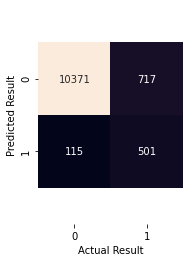

In [140]:
mat = confusion_matrix(y_pred_rf,test_y_rf)
sns.heatmap(mat, square=True, annot=True, cbar=False,fmt='.20g')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b) 
plt.show() 

In [141]:
fbwx_w2v_rf_performance = classification_report(test_y_rf, y_pred_rf,digits=4,output_dict=True)
performance = fbwx_w2v_rf_performance
model_name = 'fbwx_w2v_Ramdom Forest'
performance_df = sklearn_perform(model_name,performance,performance_df)
performance_df

,accuracy,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support
fbwx_w2v_LR,0.928828,0.709467,0.535304,0.610201,1218,0.947520,0.974537,0.960839,10486,0.828493,0.754921,0.785520,11704,0.922746,0.928828,0.924349,11704
fbwx_w2v_LR_naive_resampling,0.872095,0.442427,0.880131,0.588849,1218,0.984269,0.871162,0.924268,10486,0.713348,0.875646,0.756558,11704,0.927881,0.872095,0.889362,11704
fbwx_w2v_linear_SVM,0.930109,0.726757,0.526273,0.610476,1218,0.946683,0.977017,0.961611,10486,0.836720,0.751645,0.786043,11704,0.923796,0.930109,0.925069,11704
fbwx_w2v_linear_SVM_naive_resampling,0.869532,0.436965,0.879310,0.583810,1218,0.984113,0.868396,0.922640,10486,0.710539,0.873853,0.753225,11704,0.927173,0.869532,0.887379,11704
fbwx_w2v_rbf_SVM(gamma=0.1),0.934211,0.764775,0.531199,0.626938,1218,0.947412,0.981022,0.963924,10486,0.856094,0.756111,0.795431,11704,0.928406,0.934211,0.928855,11704
fbwx_w2v_rbf_SVM(gamma=0.1)_naive_resampling,0.921309,0.594888,0.764368,0.669062,1218,0.971693,0.939538,0.955345,10486,0.783291,0.851953,0.812204,11704,0.932480,0.921309,0.925553,11704
fbwx_w2v_rbf_SVM(gamma=1/k),0.934638,0.773221,0.526273,0.626282,1218,0.946943,0.982071,0.964187,10486,0.860082,0.754172,0.795235,11704,0.928864,0.934638,0.929022,11704
fbwx_w2v_rbf_SVM(gamma=1/k)_naive_resampling,0.893199,0.492593,0.873563,0.629959,1218,0.983864,0.895480,0.937594,10486,0.738228,0.884521,0.783776,11704,0.932739,0.893199,0.905579,11704
fbwx_w2v_Ramdom Forest,0.928913,0.813312,0.411330,0.546347,1218,0.935335,0.989033,0.961435,10486,0.874324,0.700182,0.753891,11704,0.922637,0.928913,0.918238,11704


In [147]:
test_result_rbf_svm_2 = generate_result_data(test_rf,y_pred_rf)

### Model 5.2 现有样本数据训练word2vec + Random Forest + Random Naive Resampling

In [142]:
X_resampling = np.array(train_X_rf)
y_resampling = train_y_rf
ros = RandomOverSampler(random_state=0)
X_resampled_naive, y_resampled_naive = ros.fit_resample(X_resampling, y_resampling)

In [143]:
startTime = time.time()
rfc_model_resampling=RandomForestClassifier() 
rfc_model_resampling.fit(X_resampled_naive,y_resampled_naive)
usedTime = time.time() - startTime
usedTime

112.90556621551514

In [144]:
y_pred_rf_resampling = rfc_model_resampling.predict(test_X_rf)
print(classification_report(test_y_rf, y_pred_rf_resampling,digits=4))

              precision    recall  f1-score   support

           0     0.9428    0.9788    0.9605     10486
           1     0.7283    0.4885    0.5848      1218

    accuracy                         0.9278     11704
   macro avg     0.8355    0.7337    0.7726     11704
weighted avg     0.9205    0.9278    0.9214     11704



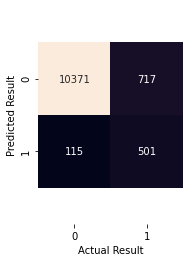

In [145]:
mat = confusion_matrix(y_pred_rf,test_y_rf)
sns.heatmap(mat, square=True, annot=True, cbar=False,fmt='.20g')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b) 
plt.show() 

In [146]:
fbwx_w2v_rf_naive_resampling_performance = classification_report(test_y_rf, y_pred_rf_resampling,digits=4,output_dict=True)
performance = fbwx_w2v_rf_naive_resampling_performance
model_name = 'fbwx_w2v_Ramdom Forest naive_resampling'
performance_df = sklearn_perform(model_name,performance,performance_df)
performance_df

,accuracy,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support
fbwx_w2v_LR,0.928828,0.709467,0.535304,0.610201,1218,0.947520,0.974537,0.960839,10486,0.828493,0.754921,0.785520,11704,0.922746,0.928828,0.924349,11704
fbwx_w2v_LR_naive_resampling,0.872095,0.442427,0.880131,0.588849,1218,0.984269,0.871162,0.924268,10486,0.713348,0.875646,0.756558,11704,0.927881,0.872095,0.889362,11704
fbwx_w2v_linear_SVM,0.930109,0.726757,0.526273,0.610476,1218,0.946683,0.977017,0.961611,10486,0.836720,0.751645,0.786043,11704,0.923796,0.930109,0.925069,11704
fbwx_w2v_linear_SVM_naive_resampling,0.869532,0.436965,0.879310,0.583810,1218,0.984113,0.868396,0.922640,10486,0.710539,0.873853,0.753225,11704,0.927173,0.869532,0.887379,11704
fbwx_w2v_rbf_SVM(gamma=0.1),0.934211,0.764775,0.531199,0.626938,1218,0.947412,0.981022,0.963924,10486,0.856094,0.756111,0.795431,11704,0.928406,0.934211,0.928855,11704
fbwx_w2v_rbf_SVM(gamma=0.1)_naive_resampling,0.921309,0.594888,0.764368,0.669062,1218,0.971693,0.939538,0.955345,10486,0.783291,0.851953,0.812204,11704,0.932480,0.921309,0.925553,11704
fbwx_w2v_rbf_SVM(gamma=1/k),0.934638,0.773221,0.526273,0.626282,1218,0.946943,0.982071,0.964187,10486,0.860082,0.754172,0.795235,11704,0.928864,0.934638,0.929022,11704
fbwx_w2v_rbf_SVM(gamma=1/k)_naive_resampling,0.893199,0.492593,0.873563,0.629959,1218,0.983864,0.895480,0.937594,10486,0.738228,0.884521,0.783776,11704,0.932739,0.893199,0.905579,11704
fbwx_w2v_Ramdom Forest,0.928913,0.813312,0.411330,0.546347,1218,0.935335,0.989033,0.961435,10486,0.874324,0.700182,0.753891,11704,0.922637,0.928913,0.918238,11704
fbwx_w2v_Ramdom Forest naive_resampling,0.927802,0.728274,0.488506,0.584767,1218,0.942776,0.978829,0.960464,10486,0.835525,0.733667,0.772615,11704,0.920453,0.927802,0.921366,11704


In [148]:
test_result_rbf_svm_2 = generate_result_data(test_rf,y_pred_rf_resampling)

### Model 6.1 现有样本数据训练word2vec + Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
et_model=ExtraTreesClassifier()

### Model 7.1 现有样本数据训练word2vec + Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb_model=GaussianNB()

### Model 8.1 现有样本数据训练word2vec + KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()

### Model 4.1: zhihu word vectors + cnn

#### 0.需要的库

In [ ]:
# 首先加载必用的库，jieba和gensim专门中文 
# %matplotlib inline功能是可以内嵌绘图，并且可以省略掉plt.show()这一步
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import re #正则化用
import jieba # 中文必须用【结巴分词】，因为计算机不会断句
# gensim用来加载预训练word vector
from gensim.models import KeyedVectors
#KeyedVectors实现实体（单词、文档、图片都可以）和向量之间的映射，实体都用string id表示
#有时候运行代码时会有很多warning输出，如提醒新版本之类的，如果不想乱糟糟的输出可以这样
import warnings
warnings.filterwarnings("ignore")

#### 1.预训练词向量

In [ ]:
cn_model = KeyedVectors.load_word2vec_format('sgns.zhihu.bigram', 
                                          binary=False)

#### 2.词向量模型

In [ ]:
# 由此可见每一个词都对应一个长度为300的向量
embedding_dim = cn_model['建筑'].shape[0]  #一词山东大学，shape[0]返回行数
print('词向量的长度为{}'.format(embedding_dim))
#cn_model['建筑']

In [ ]:
# 计算相似度
cn_model.similarity('伤亡', '事故')

In [ ]:
# dot（'橘子'/|'橘子'|， '橙子'/|'橙子'| ），余弦相似度
np.dot(cn_model['伤亡']/np.linalg.norm(cn_model['伤亡']), 
cn_model['事故']/np.linalg.norm(cn_model['事故']))

In [ ]:
# 找出最相近的词，余弦相似度
cn_model.most_similar(positive=['事故'], topn=10)

In [ ]:
# 找出不同的词
test_words = '事故 故障 爆炸事件 死亡 建筑'
test_words_result = cn_model.doesnt_match(test_words.split())
print('在 '+test_words+' 中:\n不是同一类别的词为: %s' %test_words_result)

In [ ]:
cn_model.most_similar(positive=['建筑','事故'], negative=['工程'], topn=1)

#### 3.训练语料 （数据集）

In [ ]:
# 我们使用tensorflow的keras接口来建模
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, LSTM, Bidirectional#Dense全连接
#Bidirectional双向LSTM  callbacks用来调参
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.keras import models

In [ ]:
# 我们使用tensorflow的keras接口来建模
from keras.models import Sequential
from keras.layers import Dense, GRU, Embedding, LSTM, Bidirectional#Dense全连接
#Bidirectional双向LSTM  callbacks用来调参
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau


#### 4.分词和tokenize

In [ ]:
train_tokens = newvalues['baidu_seg'].tolist()

In [ ]:
train_tokens = []
for row_idx in range(newvalues.shape[0]):
    cut_list = newvalues.loc[row_idx, 'baidu_seg'].copy()
    for i, word in enumerate(cut_list):
        try:
            cut_list[i] = cn_model.vocab[word].index
        except KeyError:
            cut_list[i] = 0
    train_tokens.append(cut_list)

In [ ]:
newvalues.loc[0, 'baidu_seg']

#### 5.索引长度标准化
因为每段评语的长度是不一样的，我们如果单纯取最长的一个评语，并把其他评填充成同样的长度，这样十分浪费计算资源，所以我们取一个折衷的长度。

In [ ]:
# 获得所有tokens的长度
num_tokens = [ len(tokens) for tokens in train_tokens ]
num_tokens = np.array(num_tokens)


In [ ]:
# 平均tokens的长度
np.mean(num_tokens)

In [ ]:
# 最长的评价tokens的长度
np.max(num_tokens)

In [ ]:
plt.hist(np.log(num_tokens), bins = 100)#有大有小取对数
plt.xlim((3,6))
plt.ylabel('number of tokens')
plt.xlabel('length of tokens')
plt.title('Distribution of tokens length')
plt.show()

In [ ]:
# 取tokens平均值并加上两个tokens的标准差，
# 假设tokens长度的分布为正态分布，则max_tokens这个值可以涵盖95%左右的样本
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

In [ ]:
# 取tokens的长度为1806时，大约95%的样本被涵盖
# 我们对长度不足的进行padding，超长的进行修剪
np.sum( num_tokens < max_tokens ) / len(num_tokens)

#### 6.反向tokenize
为了之后来验证 我们定义一个function，用来把索引转换成可阅读的文本，这对于debug很重要。

In [ ]:
# 用来将tokens转换为文本
def reverse_tokens(tokens):
    text = ''
    for i in tokens:
        if i != 0:
            text = text + cn_model.index2word[i]
        else:
            text = text + ' '
    return text


In [ ]:
reverse = reverse_tokens(train_tokens[100])
reverse

In [ ]:
newvalues.loc[100, 'baidu_seg']

#### 7.构建embedding matrix
现在我们来为模型准备embedding matrix（词向量矩阵），根据keras的要求，我们需要准备一个维度为(numwords, embeddingdim)的矩阵【num words代表我们使用的词汇的数量，emdedding dimension在我们现在使用的预训练词向量模型中是300，每一个词汇都用一个长度为300的向量表示】注意我们只选择使用前50k个使用频率最高的词，在这个预训练词向量模型中，一共有260万词汇量，如果全部使用在分类问题上会很浪费计算资源，因为我们的训练样本很小，一共只有4k，如果我们有100k，200k甚至更多的训练样本时，在分类问题上可以考虑减少使用的词汇量。

In [ ]:
# 只使用大库前50000个词
num_words = 100000
# 初始化embedding_matrix，之后在keras上进行应用
embedding_matrix = np.zeros((num_words, embedding_dim))
# embedding_matrix为一个 [num_words，embedding_dim] 的矩阵
# 维度为 50000 * 300
for i in range(num_words):
    embedding_matrix[i,:] = cn_model[cn_model.index2word[i]]
embedding_matrix = embedding_matrix.astype('float32')


In [ ]:
# 检查index是否对应，
# 输出300意义为长度为300的embedding向量一一对应
np.sum( cn_model[cn_model.index2word[333]] == embedding_matrix[333] )

In [ ]:
# embedding_matrix的维度，
# 这个维度为keras的要求，后续会在模型中用到
embedding_matrix.shape

In [ ]:
train_tokens[0]

In [ ]:
# 进行padding和truncating， 输入的train_tokens是一个list
# 返回的train_pad是一个numpy array
train_pad = pad_sequences(train_tokens, maxlen=max_tokens,
                            padding='pre', truncating='pre')


In [ ]:
len(train_pad[1])

In [ ]:
pd.DataFrame(train_pad[11]).shape

In [ ]:
# 超出9000个词向量的词用0代替
train_pad[train_pad >= num_words ] = 0

In [ ]:
# 可见padding之后前面的tokens全变成0，文本在最后面
train_pad[1003]

In [ ]:
# pd.DataFrame(train_pad[10])[0].value_counts()
# 训练样本专业性很强，而预训练的词向量所用文本包含许多领域

In [ ]:
train_target = newvalues.label

In [ ]:
# 进行训练和测试样本的分割
from sklearn.model_selection import train_test_split


In [ ]:
train_target.shape
train_pad.shape

In [ ]:
# 90%的样本用来训练，剩余10%用来测试
#因为前2000个文件夹都是neg一类，所以打乱顺序来训练 random_state
X_train, X_test, y_train, y_test = train_test_split(train_pad,
                                                    train_target,
                                                    test_size=0.1,
                                                    random_state=12
                                                    )


In [ ]:
import random
X_train = random.sample(train_pad.tolist(), train_pad.shape[0]*0.7) # 结果['a', 'd', 'b', 'f', 'c']，每次运行结果不同。

In [ ]:
reverse = reverse_tokens(train_tokens[0])
reverse